### Today:
* Support Vector Machine
    * Linear SVM
        * Hard-margin
        * Soft-margin
    * Nonlinear SVM

### Resources:
* Support Vector Machine: https://www.svm-tutorial.com/
* Support Vector Machine: http://cs229.stanford.edu/notes/cs229-notes3.pdf
* Support Vector Machine: http://web.mit.edu/zoya/www/SVM.pdf

# Soft-margin SVM

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.reset_default_graph()

In [2]:
# Load dataset as numpy array
data = np.loadtxt('../../data/03_LogisticRegression/lr_data.csv', delimiter=',')

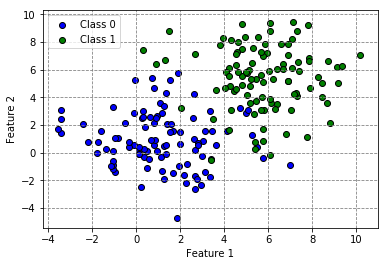

In [3]:
# Find index of samples with class 0
idx = data[:, 2] == 0.0

# Plot dataset
fig, ax = plt.subplots()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.scatter(data[idx][:, 0], data[idx][:,1], c='b', edgecolors='k', label='Class 0')
ax.scatter(data[~idx][:,0], data[~idx][:,1], c='g', edgecolors='k', label='Class 1')
ax.grid(True, color='gray', linestyle='dashed')
ax.legend()

$$ D = \Big\{ \big(x^{(i)}, y^{(i)} \big) \; \mid \; x^{(i)} \in \mathbb{R}^{n}, y^{(i)} \in \{-1, 1\} \Big\}_{i=1}^{m} $$

In [4]:
# Split dataset on features and labels
x_data = data[:, :2]
y_data = data[:, 2].reshape(len(data), 1)
# Convert labels to -1, 1
y_data[y_data==0] = -1

In [5]:
# Data parameters
train_size = len(data)
n_features = 2
n_labels = 1

# Training parameters
C = 0.1
n_epoch = 100
batch_size = 100
learning_rate = 0.01

## Model

In [6]:
# Graph input
X = tf.placeholder(tf.float32, [None, n_features], "X")
y = tf.placeholder(tf.float32, [None, n_labels], "y")

# Model parameters
W = tf.Variable(tf.random_normal([n_features, n_labels]))
b = tf.Variable(tf.random_normal([n_labels]))

In [7]:
hypothesis = tf.add(tf.matmul(X, W), b)

## Cost

$$ \frac{1}{2} \| w \|_{2}^{2} + C\sum_{i=1}^{m} \max \big(0, 1 - y^{(i)} (w^{T}x^{(i)} + b) \big)$$

In [8]:
regularization_loss = 0.5 * tf.reduce_sum(tf.square(W)) 

hinge_loss = tf.reduce_sum(tf.maximum(tf.zeros([batch_size, 1]),  1 - y * hypothesis))

svm_loss = regularization_loss + C * hinge_loss

## Optimization

In [9]:
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(svm_loss)

## Evaluation

In [10]:
predicted_class = tf.sign(hypothesis)
correct_prediction = tf.equal(y, predicted_class)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Train

In [11]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(n_epoch * train_size // batch_size):
        
        offset = (step * batch_size) % train_size
        batch_data = x_data[offset:(offset + batch_size), :]
        batch_labels = y_data[offset:(offset + batch_size)]
        
        train_step.run(feed_dict={X: batch_data, y: batch_labels})
        
        print('Loss: ', svm_loss.eval(feed_dict={X: batch_data, y: batch_labels}))
    
    print("Accuracy on train:", accuracy.eval(feed_dict={X: x_data, y: y_data}))
    W_computed, b_computed = W.eval(), b.eval()

Loss:  4.8870187
Loss:  2.9099274
Loss:  2.8475423
Loss:  2.39904
Loss:  2.401584
Loss:  2.1618905
Loss:  2.108677
Loss:  2.084004
Loss:  1.9957597
Loss:  2.0740573
Loss:  1.9198185
Loss:  2.067161
Loss:  1.8714439
Loss:  2.0665543
Loss:  1.8477387
Loss:  2.0626125
Loss:  1.827581
Loss:  2.0566814
Loss:  1.8151293
Loss:  2.055207
Loss:  1.7955445
Loss:  2.0541074
Loss:  1.7836277
Loss:  2.0529308
Loss:  1.7663668
Loss:  2.0566218
Loss:  1.7589473
Loss:  2.0553503
Loss:  1.7611346
Loss:  2.0564165
Loss:  1.7508417
Loss:  2.0510404
Loss:  1.7551943
Loss:  2.052108
Loss:  1.7306359
Loss:  2.0448759
Loss:  1.7343144
Loss:  2.0384722
Loss:  1.7378429
Loss:  2.035689
Loss:  1.7304918
Loss:  2.0357394
Loss:  1.717291
Loss:  2.024824
Loss:  1.7461337
Loss:  2.0305562
Loss:  1.7082405
Loss:  2.019603
Loss:  1.7133057
Loss:  2.024688
Loss:  1.701249
Loss:  2.013812
Loss:  1.7061864
Loss:  2.017189
Loss:  1.7001845
Loss:  2.0071855
Loss:  1.7195528
Loss:  2.003563
Loss:  1.6932542
Loss:  2.004791

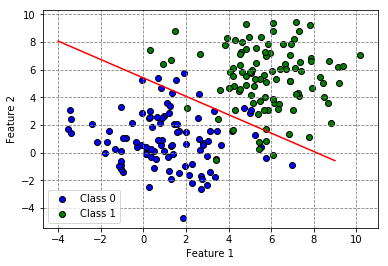

In [12]:
parameters = [b_computed[0], W_computed[1][0], W_computed[0][0]]
parameters
x = np.arange(-4, 10)
y = (-parameters[0] - parameters[1] * x) / parameters[2]
ax.plot(x, y, '-', color='r', marker=' ')
fig